12 response to reviewers

Possible additional analysis in reposne to reviewers 

use standard VM

# Load libraries

In [1]:
rm(list=ls())

In [22]:
my.packages <- c('data.table','Hmisc','tidyverse','bigrquery','lubridate','pROC','stats')
lapply(my.packages,
       function(pkg) { if(! pkg %in% installed.packages()) { install.packages(pkg)} } )
lapply(my.packages,library,character.only = TRUE)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[1]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[2]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[3]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[4]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[5]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[6]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[7]]
 [1] "pROC"       "bigrquery"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"

In [23]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pROC_1.18.2       bigrquery_1.4.2   lubridate_1.9.3   forcats_1.0.0    
 [5] stringr_1.5.0     dplyr_1.1.2       purrr_1.0.1       readr_2.1.4      
 [9] tidyr_1.3.0       tib

# Functions used in this notebook

In [4]:
# Functions that are used in this notebook
# need to add in UC1 or UC2. Need to check the OR analysis firt to decide which to use. 
# It doesn't look like either UC1 or UC2 is significant, so may be best to ignore
# the data set must contain variables named my.PRS, CRC.status, sex and censored.age

# function to get the ORs and CIs for one s.d. change in PRS
addparentheses <- function(x){paste0("(", x, ")")}

get.sex.age.pvalue <- function(subset.dt)
    {
    glm2 <- summary(glm(CRC.status ~ my.PRS + sex + censored.age, data=subset.dt,family="binomial"))
    (p.sex <- formatC((glm2$coef["sex",4]), format="e", digits=2))
    (p.age <- round((glm2$coef["censored.age",4]), 2))
    c(p.sex,p.age)
}

get.OR.round <- function(subset.dt)
    {
    glm1 <- summary(glm(CRC.status ~ my.PRS, data=subset.dt,family="binomial"))
    glm2 <- summary(glm(CRC.status ~ my.PRS + sex + censored.age, data=subset.dt,family="binomial"))
    beta1 <-  (glm1$coef["my.PRS",1])
    beta2 <- (glm2$coef["my.PRS",1])
    OR1 <- round(exp(glm1$coef["my.PRS",1]), 2)
    OR2 <- round(exp(glm2$coef["my.PRS",1]), 2)
    SD1 <- glm1$coef["my.PRS",2]
    SD2 <- glm2$coef["my.PRS",2]
    CI1 <- round(exp(beta1 + (SD1* qnorm(c(0.025,0.975)))), 2) 
    CI2 <- round(exp(beta2 + (SD2* qnorm(c(0.025,0.975)))), 2)
    rbind( c(OR1,paste(CI1[1],CI1[2],sep=",")), c(OR2, paste(CI2[1],CI2[2],sep=",")))
}
get.OR <- function(subset.dt)
    {
    glm1 <- summary(glm(CRC.status ~ my.PRS, data=subset.dt,family="binomial"))
    glm2 <- summary(glm(CRC.status ~ my.PRS + sex + censored.age, data=subset.dt,family="binomial"))
    beta1 <-  (glm1$coef["my.PRS",1])
    beta2 <- (glm2$coef["my.PRS",1])
    OR1 <- exp(glm1$coef["my.PRS",1])
    OR2 <- exp(glm2$coef["my.PRS",1])
    SD1 <- glm1$coef["my.PRS",2]
    SD2 <- glm2$coef["my.PRS",2]
    CI1 <- exp(beta1 + (SD1* qnorm(c(0.025,0.975))))
    CI2 <- exp(beta2 + (SD2* qnorm(c(0.025,0.975))))
    rbind( c(OR1,paste(CI1[1],CI1[2],sep=",")), c(OR2, paste(CI2[1],CI2[2],sep=",")))
}

# function to get the ORs and CIs for comparing top group to middle group
get.OR.group.round <- function(subset.dt)
    {
    glm1 <- summary(glm(CRC.status ~ my.group, data=subset.dt,family="binomial"))
    glm2 <- summary(glm(CRC.status ~ my.group + sex + censored.age, data=subset.dt,family="binomial"))
    beta1 <-  (glm1$coef["my.group",1])
    beta2 <- (glm2$coef["my.group",1])
    OR1 <- round(exp(glm1$coef["my.group",1]), 2)
    OR2 <- round(exp(glm2$coef["my.group",1]), 2)
    SD1 <- glm1$coef["my.group",2]
    SD2 <- glm2$coef["my.group",2]
    CI1 <- round(exp(beta1 + (SD1* qnorm(c(0.025,0.975)))), 2) 
    CI2 <- round(exp(beta2 + (SD2* qnorm(c(0.025,0.975)))), 2)
    rbind( c(OR1,paste(CI1[1],CI1[2],sep=",")), c(OR2, paste(CI2[1],CI2[2],sep=",")))
}

get.OR.quants <- function(subset.dt)
    {
    glm1 <- summary(glm(CRC.status ~ T1 + T2 + T4 + T5, data=subset.dt,family="binomial"))
    glm2 <- summary(glm(CRC.status ~ T1 + T2 + T4 + T5 + sex + censored.age, data=subset.dt,family="binomial"))
    beta1 <-  c(glm1$coef["T1",1],glm1$coef["T2",1],0,glm1$coef["T4",1],glm1$coef["T5",1])
    beta2 <- c(glm2$coef["T1",1],glm2$coef["T2",1],0,glm2$coef["T4",1],glm2$coef["T5",1])
    OR1 <- exp(beta1)
    OR2 <- exp(beta2)
    SD1 <- c(glm1$coef["T1",2],glm1$coef["T2",2],0, glm1$coef["T4",2],glm1$coef["T5",2]) 
    SD2 <- c(glm2$coef["T1",2],glm2$coef["T2",2],0, glm2$coef["T4",2],glm2$coef["T5",2])
    CI1.low <- (exp(beta1 + (SD1* qnorm(0.025)))) 
    CI1.upp <- (exp(beta1 + (SD1* qnorm(0.975))))
    CI2.low <- (exp(beta2 + (SD2* qnorm(0.025)))) 
    CI2.upp <- (exp(beta2 + (SD2* qnorm(0.975))))
    
    cbind(OR1,CI1.low,CI1.upp, OR2,CI2.low,CI2.upp)
    
}
#need to deal with inf and -inf
plot.quant.OR <- function(df.raw,df.pc,df.anc,df.broad,df.branc,main.title="",color="black"){
    mid.quant <- c(10,30,50,70,90)
    min.check <- c(df.raw[,2], df.pc[,2], df.anc[,2], df.broad[,2],df.branc[,2])
    max.check <- c(df.raw[,3], df.pc[,3], df.anc[,3], df.broad[,3],df.branc[,3])
    min.y <- min(min.check[is.finite(min.check)])
    max.y <- max(max.check[is.finite(max.check)])
#    min.y <- min(df.raw[,2], df.pc[,2], df.anc[,2], df.broad[,2],df.branc[,2])
#    max.y <- max(df.raw[,3], df.pc[,3], df.anc[,3], df.broad[,3],df.branc[,3])
    par(mfrow=c(6,1), mar= c(0.4, 4.1,1, 2.1))
    plot(mid.quant,df.raw[,1],type="p", ylim=c(min.y, max.y), main=main.title, xlab="", ylab="PRS.RAW",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=df.raw[,2],x1=mid.quant,y1=df.raw[,3],col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=1, lty=2, col="gray")
    plot(mid.quant,df.pc[,1],type="p", ylim=c(min.y, max.y), main="", xlab="", ylab="PRS.PC",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=df.pc[,2],x1=mid.quant,y1=df.pc[,3],col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=1, lty=2, col="gray")
    plot(mid.quant,df.anc[,1],type="p", ylim=c(min.y, max.y), main="", xlab="", ylab="PRS.ANC",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=df.anc[,2],x1=mid.quant,y1=df.anc[,3],col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=1, lty=2, col="gray")
    plot(mid.quant,df.broad[,1],type="p", ylim=c(min.y, max.y), main="", xlab="Quantiles", ylab="BROAD.PRS",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=df.broad[,2],x1=mid.quant,y1=df.broad[,3],col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=1, lty=2, col="gray")
    plot(mid.quant,df.branc[,1],type="p", ylim=c(min.y, max.y), main="", xlab="Quantiles", ylab="BRANC.PRS",col=color)
    arrows(x0=mid.quant,y0=df.branc[,2],x1=mid.quant,y1=df.broad[,3],col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=1, lty=2, col="gray")

}


plot.quant.logOR <- function(df.raw,df.pc,df.anc,df.broad,df.branc,main.title="",color="black"){
    mid.quant <- c(10,30,50,70,90)
    min.check <- c(df.raw[,2], df.pc[,2], df.anc[,2], df.broad[,2],df.branc[,2])
    max.check <- c(df.raw[,3], df.pc[,3], df.anc[,3], df.broad[,3],df.branc[,3])
    min.y <- log(min(min.check[is.finite(min.check) & min.check>0]))
    max.y <- log(max(max.check[is.finite(max.check) & max.check>0]))
    letter.at <- max.y - 0.15 * (max.y-min.y)
    par(mfrow=c(6,1), mar= c(0.4, 4.1,1, 2.1))
    plot(mid.quant,log(df.raw[,1]),type="p", ylim=c(min.y, max.y), main="", xlab="", ylab="",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=log(df.raw[,2]),x1=mid.quant,y1=log(df.raw[,3]),col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=0, lty=2, col="gray")
    mtext("A", 2, adj=1, padj=0, line=3, las=2,at=letter.at)
    plot(mid.quant,log(df.pc[,1]),type="p", ylim=c(min.y, max.y), main="", xlab="", ylab="",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=log(df.pc[,2]),x1=mid.quant,y1=log(df.pc[,3]),col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=0, lty=2, col="gray")
    mtext("B", 2, adj=1, padj=0, line=3, las=2,at=letter.at)
    plot(mid.quant,log(df.anc[,1]),type="p", ylim=c(min.y, max.y), main="", xlab="", ylab="",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=log(df.anc[,2]),x1=mid.quant,y1=log(df.anc[,3]),col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=0, lty=2, col="gray")
    mtext("C", 2, adj=1, padj=0, line=3, las=2,at=letter.at)
    plot(mid.quant,log(df.broad[,1]),type="p", ylim=c(min.y, max.y), main="", xlab="Quantiles", ylab="",xaxt='n',col=color)
    arrows(x0=mid.quant,y0=log(df.broad[,2]),x1=mid.quant,y1=log(df.broad[,3]),col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=0, lty=2, col="gray")
    mtext("D", 2, adj=1, padj=0, line=3, las=2,at=letter.at)
    plot(mid.quant,log(df.branc[,1]),type="p", ylim=c(min.y, max.y), main="", xlab="Quantiles", ylab="",col=color)
    arrows(x0=mid.quant,y0=log(df.branc[,2]),x1=mid.quant,y1=log(df.branc[,3]),col=color,code=3,angle=90,length=1/20,lwd=2)
    abline(h=0, lty=2, col="gray")
    mtext("E", 2, adj=1, padj=0, line=3, las=2,at=letter.at)

}


plot.obs.exp.ci <- function(horiz.axis=c(1:5), actuals.mat, lower.mat, upper.mat, my.ancestry="", col="black")
{
    matplot(horiz.axis,t(actuals.mat), type="n", main=my.ancestry, xlab="PRS", ylab="actual %", xaxt = "n", 
        xlim=c(0.5, 5.5),ylim=c(0,20))
    axis(1, at=1:5, labels=c("RAW", "PC","BR.AOU","ANC","BR.ANC"))
    matpoints(horiz.axis, t(actuals.mat), lwd=c(4, 3, 2), col=col, pch=1)
    matlines(horiz.axis, t(actuals.mat), lwd=c(4, 3, 2), col=col)
    arrows(x0=1,y0=lower.mat[,1],x1=1,y1=upper.mat[,1],col=col,lwd=2,code=3,angle=90,length=1/10)
    arrows(x0=2,y0=lower.mat[,2],x1=2,y1=upper.mat[,2],col=col,lwd=2,code=3,angle=90,length=1/10)
    arrows(x0=3,y0=lower.mat[,3],x1=3,y1=upper.mat[,3],col=col,lwd=2,code=3,angle=90,length=1/10)
    arrows(x0=4,y0=lower.mat[,4],x1=4,y1=upper.mat[,4],col=col,lwd=2,code=3,angle=90,length=1/10)
    arrows(x0=5,y0=lower.mat[,5],x1=5,y1=upper.mat[,5],col=col,lwd=2,code=3,angle=90,length=1/10)
    abline(h=5,lwd=2,lty=3)
    abline(h=7.5,lwd=3, lty=2)
    abline(h=10,lwd=4,lty=1)
}

# Prepare the data

In [5]:
# copy over the output file from 25 Adjust alpha3 PRS by WG PCs or admixture
#infile <- "CRC-Nov2021-PRS-adjustments-2023-03-02.tsv"
#(cp.command <- paste0("gsutil -m cp -r  gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/alpha3/",infile," ."))
infile <- "CRC-PRS-adjustments-2023-03-02.tsv"
(cp.command <- paste0("gsutil -m cp -r   gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/alpha3/",infile," ."))
system(cp.command)

[1] "gsutil -m cp -r  gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/alpha3/CRC-Nov2021-PRS-adjustments-2023-03-02.tsv ."

In [ ]:
merge.dt <- fread(infile)
str(merge.dt)

In [7]:
# standardise raw PRS, PC adjusted PRS and ANC adjusted PRS  for the OR calculations
# standardization needs to happen before reducing to the cleaned cases and screened controls
merge.dt[,norm.PRS := (PRS-mean(PRS))/sd(PRS)]
merge.dt[,norm.PRS.ADJ.PC := (PRS.ADJ.PC)/sd(PRS.ADJ.PC)]
merge.dt[,norm.PRS.ADJ.ANC := (PRS.ADJ.ANC)/sd(PRS.ADJ.ANC)]
# The broad adjustments don't need to be standardized because theoretically, they already do this
#merge.dt[,norm.BROAD.PRS := BROAD.PRS] 

In [8]:
# need to have sex be numeric
#merge.dt <- merge.dt[][!is.na(merge.dt$sex_at_birth)]
merge.dt[,sex:=ifelse(sex_at_birth=="Male",1,NA)] #since there are fewer males than females, males are 1 and females are 0
merge.dt[,sex:=ifelse(sex_at_birth=="Female",0,sex)]

In [ ]:
describe(merge.dt$sex_at_birth)
describe(merge.dt$sex)

In [10]:
# get percentiles for comparisons. Does it make sense to just look at the middle and top percentiles for now? 
# T1 bottom 20%
# T2 20-40%
# T3 40-60%
# T4 60-80%
# T5 80-100%
# Below are used for specific comparisons with the T3 group
# T6 90-100%
# T7 92.5-100%
# T8 95-100%
merge.dt[,T1.PRS:=ifelse(norm.PRS <= qnorm(.20),1,0)]
merge.dt[,T2.PRS:=ifelse(norm.PRS <= qnorm(.40) & norm.PRS > qnorm(.20),1,0)]
merge.dt[,T3.PRS:=ifelse(norm.PRS <= qnorm(.60) & norm.PRS > qnorm(.40),1,0)]
merge.dt[,T4.PRS:=ifelse(norm.PRS <= qnorm(.80) & norm.PRS > qnorm(.60),1,0)]
merge.dt[,T5.PRS:=ifelse(norm.PRS > qnorm(.80),1,0)]

merge.dt[,T6.PRS:=ifelse(norm.PRS > qnorm(.90),1,0)]
merge.dt[,T7.PRS:=ifelse(norm.PRS > qnorm(.925),1,0)]
merge.dt[,T8.PRS:=ifelse(norm.PRS > qnorm(.95),1,0)]

In [11]:
merge.dt[,T1.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC <= qnorm(.20),1,0)]
merge.dt[,T2.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC <= qnorm(.40) & norm.PRS.ADJ.PC > qnorm(.20),1,0)]
merge.dt[,T3.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC <= qnorm(.60) & norm.PRS.ADJ.PC > qnorm(.40),1,0)]
merge.dt[,T4.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC <= qnorm(.80) & norm.PRS.ADJ.PC > qnorm(.60),1,0)]
merge.dt[,T5.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC > qnorm(.80),1,0)]

merge.dt[,T6.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC > qnorm(.90),1,0)]
merge.dt[,T7.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC > qnorm(.925),1,0)]
merge.dt[,T8.PRS.ADJ.PC:=ifelse(norm.PRS.ADJ.PC > qnorm(.95),1,0)]

In [12]:
merge.dt[,T1.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC <= qnorm(.20),1,0)]
merge.dt[,T2.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC <= qnorm(.40) & norm.PRS.ADJ.ANC > qnorm(.20),1,0)]
merge.dt[,T3.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC <= qnorm(.60) & norm.PRS.ADJ.ANC > qnorm(.40),1,0)]
merge.dt[,T4.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC <= qnorm(.80) & norm.PRS.ADJ.ANC > qnorm(.60),1,0)]
merge.dt[,T5.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC > qnorm(.80),1,0)]

merge.dt[,T6.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC > qnorm(.90),1,0)]
merge.dt[,T7.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC > qnorm(.925),1,0)]
merge.dt[,T8.PRS.ADJ.ANC:=ifelse(norm.PRS.ADJ.ANC > qnorm(.95),1,0)]

In [13]:
merge.dt[,T1.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 <= qnorm(.20),1,0)]
merge.dt[,T2.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 <= qnorm(.40) & PRS.BR.AOU1 > qnorm(.20),1,0)]
merge.dt[,T3.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 <= qnorm(.60) & PRS.BR.AOU1 > qnorm(.40),1,0)]
merge.dt[,T4.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 <= qnorm(.80) & PRS.BR.AOU1 > qnorm(.60),1,0)]
merge.dt[,T5.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 > qnorm(.80),1,0)]

merge.dt[,T6.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 > qnorm(.90),1,0)]
merge.dt[,T7.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 > qnorm(.925),1,0)]
merge.dt[,T8.PRS.BR.AOU1:=ifelse(PRS.BR.AOU1 > qnorm(.95),1,0)]

In [14]:
merge.dt[,T1.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 <= qnorm(.20),1,0)]
merge.dt[,T2.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 <= qnorm(.40) & PRS.BR.ANC.AOU1 > qnorm(.20),1,0)]
merge.dt[,T3.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 <= qnorm(.60) & PRS.BR.ANC.AOU1 > qnorm(.40),1,0)]
merge.dt[,T4.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 <= qnorm(.80) & PRS.BR.ANC.AOU1 > qnorm(.60),1,0)]
merge.dt[,T5.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 > qnorm(.80),1,0)]

merge.dt[,T6.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 > qnorm(.90),1,0)]
merge.dt[,T7.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 > qnorm(.925),1,0)]
merge.dt[,T8.PRS.BR.ANC.AOU1:=ifelse(PRS.BR.ANC.AOU1 > qnorm(.95),1,0)]

In [15]:
# get participants who are less than 50% any ancestry
merge.dt[, is.admixed:=ifelse(AFR < 0.5 & AMR < 0.5 & EUR < 0.5 & EAS < 0.5 & MID < 0.5 & SAS < 0.5, 1, 0)]
describe(merge.dt$is.admixed)

merge.dt$is.admixed 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98256        0        2    0.183     6421  0.06535   0.1222 


In [16]:
# Get subset with just cleaned cases and screened controls
merge2.dt <- merge.dt[][(merge.dt$CSET3==1 | merge.dt$SCREENED==1) ]
as.data.frame(merge2.dt) %>%
    count(CRC.status,CSET1, CSET3, SCREENED)

CRC.status,CSET1,CSET3,SCREENED,n
<int>,<int>,<int>,<int>,<int>
0,0,0,1,12378
1,1,1,0,348


In [17]:
describe(merge2.dt$is.admixed)

merge2.dt$is.admixed 
       n  missing distinct     Info      Sum     Mean      Gmd 
   12726        0        2    0.209      959  0.07536   0.1394 


# Means and S.D. after scaling PC_my and AD_mu

In [18]:
(norm.PRS.ADJ.PC.means <- c(mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AFR"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AMR"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EUR"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="MID"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="SAS"]),
               mean(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="OTH"])))

(norm.PRS.ADJ.PC.sds <- c(sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AFR"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AMR"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EUR"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="MID"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="SAS"]),
               sd(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="OTH"])))

(sample.size <- c(length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AFR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AMR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EUR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="MID"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="SAS"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="OTH"])))

[1]  0.016213985 -0.016721806 -0.002523158  0.089936453 -0.545006897
[6]  0.399264986 -0.145749547

[1] 0.8880628 0.9796516 1.0080396 1.0273821 1.0229602 1.0261569 1.0123115

[1] 22385  9382  2069 44099  4056   760 15505

In [19]:
(norm.PRS.ADJ.ANC.means <- c(mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AFR"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AMR"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EAS"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EUR"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="MID"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="SAS"]),
               mean(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="OTH"])))

(norm.PRS.ADJ.ANC.sds <- c(sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AFR"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AMR"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EAS"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EUR"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="MID"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="SAS"]),
               sd(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="OTH"])))

(sample.size <- c(length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AFR"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AMR"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EAS"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EUR"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="MID"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="SAS"]),
               length(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="OTH"])))

[1] -0.0030283667  0.0053162040  0.0004141985  0.0054908368  0.0642388659
[6]  0.0225420541 -0.0324262385

[1] 0.8985749 0.9910806 1.0251591 1.0398167 1.0339822 1.0387799 1.0134691

[1] 22385  9382  2069 44099  4056   760 15505

In [20]:
sample.size <- c(length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AFR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AMR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EUR"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="MID"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="SAS"]),
               length(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="OTH"]))

# Kolmogorov-Smirnov tests for N(0,1)

In [32]:
anc.names <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")

In [33]:
(norm.PRS.ADJ.PC.ks.tests <- c(ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AFR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="AMR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EUR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="MID"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="SAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="OTH"], "pnorm",0,1)$p.value))
cbind(anc.names,norm.PRS.ADJ.PC.ks.tests)

[1] 0.00000000 0.04197329 0.65756869 0.00000000 0.00000000 0.00000000 0.00000000

anc.names,norm.PRS.ADJ.PC.ks.tests
AFR,0
AMR,0.0419732863978562
EAS,0.657568685555203
EUR,0
MID,0
SAS,0
OTH,0


In [35]:
ks.test(merge.dt$norm.PRS.ADJ.PC[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value

[1] 0.6575687

In [34]:
(norm.PRS.ADJ.ANC.ks.tests <- c(ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AFR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="AMR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="EUR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="MID"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="SAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$norm.PRS.ADJ.ANC[merge.dt$my.ancestry3=="OTH"], "pnorm",0,1)$p.value))
cbind(anc.names,norm.PRS.ADJ.ANC.ks.tests)

[1] 7.216450e-15 7.153237e-01 3.015207e-01 8.745104e-06 1.741193e-03
[6] 9.129367e-01 6.603829e-05

anc.names,norm.PRS.ADJ.ANC.ks.tests
AFR,7.21644966006352e-15
AMR,0.715323670740276
EAS,0.30152065887154
EUR,8.74510358173097e-06
MID,0.00174119343729495
SAS,0.912936743987376
OTH,6.60382897382794e-05


In [36]:
(PRS.BR.REF.ks.tests <- c(ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="AFR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="AMR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="EUR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="MID"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="SAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.REF[merge.dt$my.ancestry3=="OTH"], "pnorm",0,1)$p.value))
cbind(anc.names,PRS.BR.REF.ks.tests)

[1] 4.616789e-03 1.192351e-01 5.139925e-06 0.000000e+00 0.000000e+00
[6] 5.288287e-04 2.201660e-06

anc.names,PRS.BR.REF.ks.tests
AFR,0.00461678897300111
AMR,0.119235140669971
EAS,5.13992501227634e-06
EUR,0
MID,0
SAS,0.000528828689058791
OTH,2.20166017250722e-06


In [38]:
(PRS.BR.AOU1.ks.tests <- c(ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="AFR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="AMR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="EUR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="MID"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="SAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.AOU1[merge.dt$my.ancestry3=="OTH"], "pnorm",0,1)$p.value))
cbind(anc.names,PRS.BR.AOU1.ks.tests)

[1] 1.366877e-01 7.408542e-03 3.304774e-01 0.000000e+00 0.000000e+00
[6] 1.671363e-10 0.000000e+00

anc.names,PRS.BR.AOU1.ks.tests
AFR,0.136687745792963
AMR,0.00740854241022959
EAS,0.330477438741942
EUR,0
MID,0
SAS,1.67136304796145e-10
OTH,0


In [39]:
(PRS.BR.ANC.AOU1.ks.tests <- c(ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="AFR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="AMR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="EAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="EUR"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="MID"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="SAS"], "pnorm",0,1)$p.value,
               ks.test(merge.dt$PRS.BR.ANC.AOU1[merge.dt$my.ancestry3=="OTH"], "pnorm",0,1)$p.value))
cbind(anc.names,PRS.BR.ANC.AOU1.ks.tests)

[1] 2.759017e-01 2.345216e-01 2.930432e-01 2.460074e-01 1.812900e-04
[6] 2.261689e-03 3.918374e-05

anc.names,PRS.BR.ANC.AOU1.ks.tests
AFR,0.27590171225782
AMR,0.234521613338031
EAS,0.293043195521015
EUR,0.246007418144529
MID,0.000181289951764918
SAS,0.00226168901385082
OTH,3.91837367691439e-05


# Distribution of PRSs for is.admixed

In [41]:
merge.admix.dt <- merge.dt[][merge.dt$is.admixed==1]

In [21]:
(means.admixed <- c(mean(merge.admix.dt$PRS), mean(merge.admix.dt$PRS.ADJ.PC), mean(merge.admix.dt$PRS.ADJ.ANC),
                   mean(merge.admix.dt$PRS.BR.AOU1 ), mean(merge.admix.dt$PRS.BR.ANC.AOU1)))

[1]  0.297119282 -0.050661306  0.004248617 -0.107247758  0.004024739

In [22]:
(sds.admixed <- c(sd(merge.admix.dt$PRS), sd(merge.admix.dt$PRS.ADJ.PC), sd(merge.admix.dt$PRS.ADJ.ANC),
                   sd(merge.admix.dt$PRS.BR.AOU1 ), sd(merge.admix.dt$PRS.BR.ANC.AOU1)))

[1] 0.4632625 0.4624404 0.4615061 1.0061948 1.0041690

In [22]:
c(mean(merge.admix.dt$PRS), mean(merge.admix.dt$norm.PRS.ADJ.PC), mean(merge.admix.dt$norm.PRS.ADJ.ANC),
                   mean(merge.admix.dt$PRS.BR.AOU1 ), mean(merge.admix.dt$PRS.BR.ANC.AOU1))

[1]  0.297119282 -0.109657201  0.009314074 -0.107247758  0.004024739

In [23]:
c(sd(merge.admix.dt$PRS), sd(merge.admix.dt$norm.PRS.ADJ.PC), sd(merge.admix.dt$norm.PRS.ADJ.ANC),
                   sd(merge.admix.dt$PRS.BR.AOU1 ), sd(merge.admix.dt$PRS.BR.ANC.AOU1))

[1] 0.4632625 1.0009596 1.0117415 1.0061948 1.0041690

In [23]:
dist.dt <- data.table(cbind(round(means.admixed,2),round(sds.admixed,2)))
setnames(dist.dt,c("mean","SD"))

In [26]:
(sd.cols <- names(dist.dt)[names(dist.dt) %like% "SD"])
dist.dt[ ,(sd.cols):=lapply(.SD, addparentheses), .SDcols=sd.cols]

[1] "SD"

In [31]:
(out.table <- as.data.frame(dist.dt) %>%
  unite(mean.sd,c(mean,SD),sep=" "))

mean.sd
<chr>
0.3 (0.46)
-0.05 (0.46)
0 (0.46)
-0.11 (1.01)
0 (1)


In [32]:
rownames(out.table) <- c("PRS", "PC","ANC", "BR.PC", "BR.ANC")
out.table

,mean.sd
,<chr>
PRS,0.3 (0.46)
PC,-0.05 (0.46)
ANC,0 (0.46)
BR.PC,-0.11 (1.01)
BR.ANC,0 (1)


In [33]:
t(out.table)

,PRS,PC,ANC,BR.PC,BR.ANC
mean.sd,0.3 (0.46),-0.05 (0.46),0 (0.46),-0.11 (1.01),0 (1)


In [42]:
(ks.tests.admixed <- c(ks.test(merge.admix.dt$PRS, "pnorm",0,1)$p.value, 
                       ks.test(merge.admix.dt$PRS.ADJ.PC, "pnorm",0,1)$p.value, 
                       ks.test(merge.admix.dt$PRS.ADJ.ANC, "pnorm",0,1)$p.value,
                   ks.test(merge.admix.dt$PRS.BR.AOU1, "pnorm",0,1)$p.value, 
                       ks.test(merge.admix.dt$PRS.BR.ANC.AOU1, "pnorm",0,1)$p.value))

[1] 0.000000e+00 0.000000e+00 0.000000e+00 5.184742e-13 7.535594e-01

# Look at upper tails of is.admixed

In [18]:
cutoffs <- c(0.90, 0.925, 0.95)
qnorm(cutoffs)

[1] 1.281552 1.439531 1.644854

In [19]:
get.observed.freq <- function(subset.dt, cutoff)
    {
    #cutoff <- 0.9
    (total <- length(subset.dt$my.prs))
    (count <- length(subset.dt$my.prs[subset.dt$my.prs > qnorm(cutoff)]))
    (prop <- 1 - cutoff)
    obs.freq <- round(100*binom.test(x=count,n=total,p=prop)$estimate,2)
    ci.freq <- round(100*binom.test(x=count,n=total,p=prop)$conf.int,2)
    c(obs.freq, ci.freq)
    }

In [20]:
subset.dt <- copy(merge.admix.dt) 

subset.dt$my.prs <- subset.dt$norm.PRS
length(subset.dt$my.prs)
(actual.admixed.norm <- t(matrix(c(get.observed.freq(subset.dt=subset.dt,cutoff=0.9),get.observed.freq(subset.dt=subset.dt,cutoff=0.925),
                     get.observed.freq(subset.dt=subset.dt,cutoff=0.95)),ncol=3)))

subset.dt$my.prs <- subset.dt$norm.PRS.ADJ.PC
length(subset.dt$my.prs)
(actual.admixed.norm.ADJ.PC <- t(matrix(c(get.observed.freq(subset.dt=subset.dt,cutoff=0.9),get.observed.freq(subset.dt=subset.dt,cutoff=0.925),
                     get.observed.freq(subset.dt=subset.dt,cutoff=0.95)),ncol=3)))

subset.dt$my.prs <- subset.dt$norm.PRS.ADJ.ANC
length(subset.dt$my.prs)
(actual.admixed.norm.ADJ.ANC <- t(matrix(c(get.observed.freq(subset.dt=subset.dt,cutoff=0.9),get.observed.freq(subset.dt=subset.dt,cutoff=0.925),
                     get.observed.freq(subset.dt=subset.dt,cutoff=0.95)),ncol=3)))

subset.dt$my.prs <- subset.dt$PRS.BR.AOU1
length(subset.dt$my.prs)
(actual.admixed.BR.AOU1 <- t(matrix(c(get.observed.freq(subset.dt=subset.dt,cutoff=0.9),get.observed.freq(subset.dt=subset.dt,cutoff=0.925),
                     get.observed.freq(subset.dt=subset.dt,cutoff=0.95)),ncol=3)))

subset.dt$my.prs <- subset.dt$PRS.BR.ANC.AOU1
length(subset.dt$my.prs)
(actual.admixed.BR.ANC.AOU1 <- t(matrix(c(get.observed.freq(subset.dt=subset.dt,cutoff=0.9),get.observed.freq(subset.dt=subset.dt,cutoff=0.925),
                     get.observed.freq(subset.dt=subset.dt,cutoff=0.95)),ncol=3)))
(admixed.actuals <- cbind(actual.admixed.norm[,1], actual.admixed.norm.ADJ.PC[,1],actual.admixed.BR.AOU1[,1], 
                     actual.admixed.norm.ADJ.ANC[,1], 
                     actual.admixed.BR.ANC.AOU1[,1]))
(admixed.lower <- cbind(actual.admixed.norm[,2], actual.admixed.norm.ADJ.PC[,2],actual.admixed.BR.AOU1[,2], 
                     actual.admixed.norm.ADJ.ANC[,2], 
                     actual.admixed.BR.ANC.AOU1[,2]))
(admixed.upper <- cbind(actual.admixed.norm[,3], actual.admixed.norm.ADJ.PC[,3],actual.admixed.BR.AOU1[,3], 
                     actual.admixed.norm.ADJ.ANC[,3], 
                     actual.admixed.BR.ANC.AOU1[,3]))



ERROR: Error in eval(expr, envir, enclos): object 'merge.admix.dt' not found


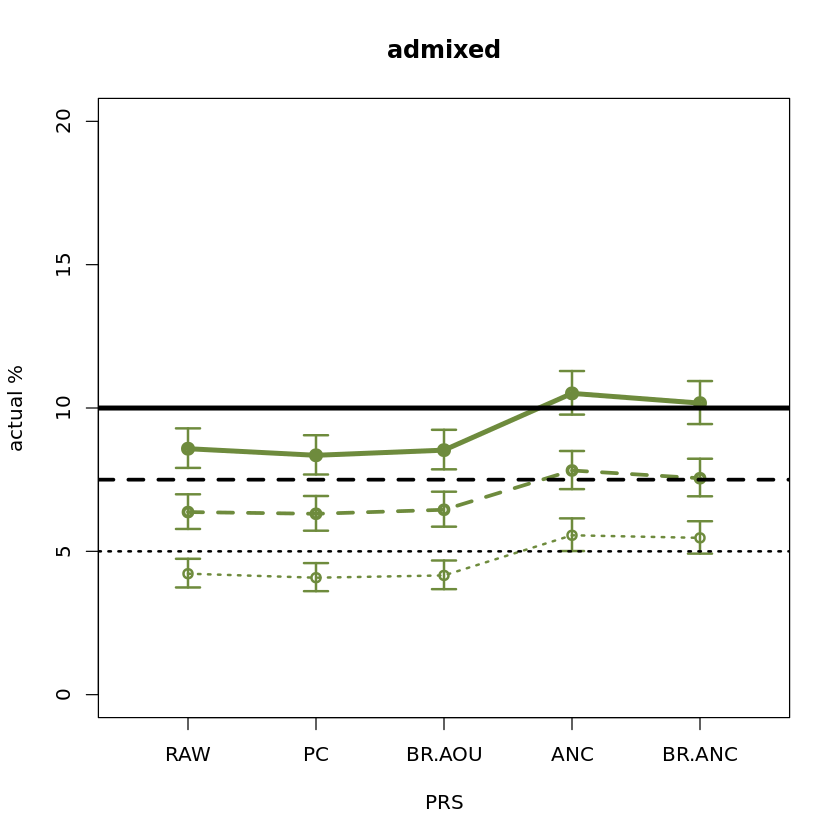

In [44]:
plot.obs.exp.ci(actuals.mat=admixed.actuals,lower.mat=admixed.lower, upper.mat=admixed.upper, my.ancestry="admixed",
                col="darkolivegreen4")